In [122]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.special import comb

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import log_loss, make_scorer
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.datasets import load_breast_cancer, load_iris

In [123]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [127]:
cd ..

/Users/liliying/Galvanize/instagram_fake_followers_detector


In [128]:
data = pd.read_csv('data_cleaned.csv')

In [129]:
data = data.rename({'Unnamed: 0':'follower_id'}, axis = 'columns').iloc[:,:-1]

In [130]:
mean_er = data['engagement_rate'][data['engagement_rate'] !=0].mean()

In [131]:
data['engagement_rate'][data['engagement_rate'] == 0] = mean_er

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [132]:
data.head()

,follower_id,user_name,full_name,num_posts,num_followers,num_followings,is_private,is_business,is_joined_recently,biography,num_followers_float,following_follower_ratio,engagement_rate
0,0,wqwqwq12345w,1998,0.0,1,12.0,0,0,1,åÁNi recentid@ ni dolid@ acÌÁ te la bancas_ÙÕ£...,1.0,6.000000,0.073413
1,1,soymuyfalsa,soy muy falsa,5.0,62,1.0,0,0,0,0,62.0,0.015873,0.073413
2,2,andrea_bordon_,andrea bordon,1.0,132,78.0,0,1,0,25/08/1999Monfalcone-Udine Italy_Ùà¨_Ùà_,132.0,0.586466,0.073413
3,3,@ndah.endah.3701,@ndah.endah.3701 _ã¢ Instagram photos and videos,3.0,798,138.0,0,1,0,Haters make me famous_Ù÷È,798.0,0.172716,0.073413
4,4,jolsuperstar_tz,jolsuperstartz,66.0,494,195.0,0,0,0,_ÙÓ¡FANSHII NDIO SPECIAL ACCOUNT YANGU KARIBUN...,494.0,0.393939,0.073413


In [133]:
X = data.iloc[:, [3,5,6,8,10,11,12]]

In [134]:
X.head()

,num_posts,num_followings,is_private,is_joined_recently,num_followers_float,following_follower_ratio,engagement_rate
0,0.0,12.0,0,1,1.0,6.000000,0.073413
1,5.0,1.0,0,0,62.0,0.015873,0.073413
2,1.0,78.0,0,0,132.0,0.586466,0.073413
3,3.0,138.0,0,0,798.0,0.172716,0.073413
4,66.0,195.0,0,0,494.0,0.393939,0.073413


In [135]:
y = data.iloc[:,7]

In [136]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name:  is_business, dtype: int64

In [137]:
X.shape

(198, 7)

In [138]:
y.shape

(198,)

### train-test split

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

In [140]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((148, 7), (50, 7), (148,), (50,))

### logistic regression

In [162]:
model_logistic = LogisticRegression()

In [163]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 84 to 122
Data columns (total 7 columns):
num_posts                   148 non-null float64
num_followings              148 non-null float64
is_private                  148 non-null int64
 is_joined_recently         148 non-null int64
num_followers_float         148 non-null float64
following_follower_ratio    148 non-null float64
engagement_rate             148 non-null float64
dtypes: float64(5), int64(2)
memory usage: 9.2 KB


In [164]:
model_logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [165]:
y_pred_logistic = model_logistic.predict_proba(X_test)[:,1]

In [166]:
y_pred_logistic

array([6.96094457e-01, 4.54189277e-01, 4.40000393e-01, 5.52480951e-01,
       4.69812145e-01, 1.74747133e-04, 2.86844067e-09, 1.81344321e-01,
       5.39320895e-06, 2.08498243e-03, 4.67325623e-01, 2.96686416e-01,
       2.73588675e-03, 1.43594154e-01, 9.93153058e-01, 3.33997244e-01,
       3.14728801e-04, 5.79533467e-01, 4.59536536e-10, 1.16254764e-01,
       3.69078194e-01, 4.22430044e-05, 7.83949455e-01, 8.79079885e-02,
       8.64255048e-01, 2.58238987e-02, 9.99306488e-01, 5.67203657e-01,
       1.41080268e-01, 2.85509086e-04, 1.75891894e-01, 4.67680214e-01,
       2.59697994e-01, 4.38948894e-01, 3.34167828e-02, 2.40116661e-01,
       2.55904771e-01, 3.79031997e-05, 7.82683267e-03, 2.94193789e-04,
       4.84836070e-01, 2.81317473e-03, 7.37411218e-06, 1.59843806e-02,
       4.72650209e-01, 1.48384100e-01, 5.10440554e-01, 9.88095186e-01,
       7.07690913e-01, 5.22323834e-01])

In [167]:
y_test_pred = pd.DataFrame({'actual':y_test,'prediction':y_pred_logistic})

# 'actual' == 0 means the account is actually not a business account, but y_pred high means 
# they are predicted to have high probability to be a business account
y_test_pred[y_test_pred['actual']== 0]

,actual,prediction
144,0,4.541893e-01
34,0,4.400004e-01
1,0,4.698121e-01
69,0,1.747471e-04
154,0,2.868441e-09
130,0,1.813443e-01
48,0,5.393209e-06
184,0,2.084982e-03
188,0,4.673256e-01
101,0,2.735887e-03


In [168]:
log_loss_logistic = log_loss(y_test, y_pred_logistic)

In [169]:
log_loss_logistic

0.6382981335066228

In [171]:
cv_logloss = -cross_val_score(model_logistic, X, y, scoring = 'neg_log_loss', cv = 10).mean()
cv_logloss

0.4284354518417016

### random forest

In [172]:
rf = RandomForestClassifier(n_estimators=100,
                            n_jobs=-1,
                            random_state=1)

In [173]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [184]:
y_pred_rf = rf.predict_proba(X_test)[:, 1]
y_pred_rf

array([0.59      , 0.43      , 0.41      , 0.53      , 0.34      ,
       0.0425    , 0.        , 0.09      , 0.01      , 0.01      ,
       0.5       , 0.41      , 0.        , 0.52      , 0.58      ,
       0.5       , 0.        , 0.5       , 0.        , 0.43333333,
       0.75      , 0.0325    , 0.57      , 0.1       , 0.55      ,
       0.        , 0.45      , 0.6       , 0.18      , 0.        ,
       0.13      , 0.54      , 0.21      , 0.45      , 0.04      ,
       0.        , 0.39      , 0.        , 0.01      , 0.01      ,
       0.55      , 0.02      , 0.01      , 0.        , 0.85      ,
       0.08      , 0.68      , 0.34      , 0.49      , 0.51      ])

In [175]:
y_test_pred = pd.DataFrame({'actual':y_test,'prediction':y_pred_rf})

y_test_pred[y_test_pred['actual']== 0]

,actual,prediction
144,0,0.4300
34,0,0.4100
1,0,0.3400
69,0,0.0425
154,0,0.0000
130,0,0.0900
48,0,0.0100
184,0,0.0100
188,0,0.5000
101,0,0.0000


In [176]:
cv_logloss_rf1 = -cross_val_score(rf, X, y, cv = 10, scoring = 'neg_log_loss').mean()

In [177]:
cv_logloss_rf1

0.45663194550772157

### Best random forest

In [53]:
random_forest_grid = {'max_depth': [3, 4, None],
                      'max_features': ['sqrt', 'log2', None],
                      'min_samples_split': [2, 4],
                      'min_samples_leaf': [1, 2, 4],
                      'bootstrap': [True, False],
                      'n_estimators': [40, 80, 100, 120, 140, 160],
                      'random_state': [359]}

rf_gridsearch = GridSearchCV(RandomForestClassifier(),
                             random_forest_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='neg_log_loss')
rf_gridsearch.fit(X_train, y_train)

print("best parameters:", rf_gridsearch.best_params_)

best_rf_model = rf_gridsearch.best_estimator_

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   47.7s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  3.4min


best parameters: {'bootstrap': True, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 40, 'random_state': 359}


[Parallel(n_jobs=-1)]: Done 1944 out of 1944 | elapsed:  3.8min finished


In [54]:
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
            oob_score=False, random_state=359, verbose=0, warm_start=False)

In [55]:
y_pred_best = best_rf_model.predict_proba(X_test)[:, 1]


In [56]:
y_pred_best

array([0.47187833, 0.49979167, 0.37392593, 0.52440776, 0.28655991,
       0.0541315 , 0.01193708, 0.37956057, 0.02092221, 0.05182128,
       0.56137211, 0.44967899, 0.02092221, 0.4523006 , 0.50386591,
       0.47518634, 0.02092221, 0.47629751, 0.01193708, 0.13132179,
       0.38944773, 0.04960988, 0.5254149 , 0.20645599, 0.5413468 ,
       0.02390517, 0.42829354, 0.47316896, 0.17982953, 0.01836685,
       0.13657042, 0.36703194, 0.17742256, 0.42991132, 0.13343674,
       0.10575357, 0.31390845, 0.02092221, 0.05691437, 0.05182128,
       0.47083351, 0.03594673, 0.02092221, 0.01765517, 0.55878589,
       0.13693387, 0.48250716, 0.44549482, 0.37240927, 0.50864914])

In [60]:
y_test_pred = pd.DataFrame({'actual':y_test,'prediction':y_pred_best})

y_test_pred[y_test_pred['actual']== 0]

,actual,prediction
144,0,0.499792
34,0,0.373926
1,0,0.286560
69,0,0.054131
154,0,0.011937
130,0,0.379561
48,0,0.020922
184,0,0.051821
188,0,0.561372
101,0,0.020922


In [57]:
cv_logloss_rf2 = -cross_val_score(best_rf_model, X, y, cv = 10, scoring = 'neg_log_loss').mean()

In [58]:
cv_logloss_rf2

0.45042685596563325

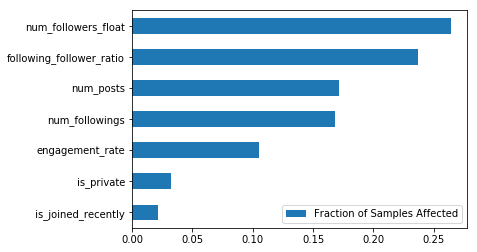

In [59]:
feat_scores = pd.DataFrame({'Fraction of Samples Affected' : rf.feature_importances_},
                           index=X.columns)
feat_scores = feat_scores.sort_values(by='Fraction of Samples Affected')
feat_scores.plot(kind='barh')

(array([16.,  1.,  2.,  3.,  1.,  1.,  5.,  2.,  4.,  3.]),
 array([0.01193708, 0.06688058, 0.12182409, 0.17676759, 0.23171109,
        0.2866546 , 0.3415981 , 0.3965416 , 0.45148511, 0.50642861,
        0.56137211]),
 <a list of 10 Patch objects>)

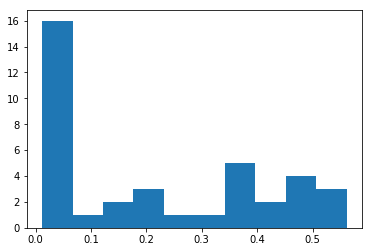

In [68]:
plt.hist(y_test_pred[y_test_pred['actual']== 0]['prediction'], bins = 10)

### ROC 

In [178]:
y_pred_rf

array([0.59      , 0.43      , 0.41      , 0.53      , 0.34      ,
       0.0425    , 0.        , 0.09      , 0.01      , 0.01      ,
       0.5       , 0.41      , 0.        , 0.52      , 0.58      ,
       0.5       , 0.        , 0.5       , 0.        , 0.43333333,
       0.75      , 0.0325    , 0.57      , 0.1       , 0.55      ,
       0.        , 0.45      , 0.6       , 0.18      , 0.        ,
       0.13      , 0.54      , 0.21      , 0.45      , 0.04      ,
       0.        , 0.39      , 0.        , 0.01      , 0.01      ,
       0.55      , 0.02      , 0.01      , 0.        , 0.85      ,
       0.08      , 0.68      , 0.34      , 0.49      , 0.51      ])

In [179]:
roc_auc_score(y_test, y_pred_rf)

0.7949561403508772

In [180]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)

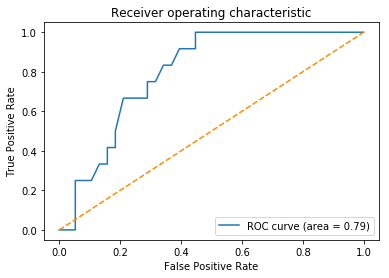

In [182]:
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred_rf))
plt.plot([0, 1], [0, 1], color='darkorange', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [2]:
cd src

/Users/liliying/Galvanize/instagram_fake_followers_detector/src


In [208]:
from DataPreparation import fc

In [209]:
fc.count_documents({})

1456

In [207]:
list(fc.find())[:10]

[{'_id': ObjectId('5bfc88f3baead13dc62256a4'),
  'url': 'https://www.instagram.com/soymuyfalsa/',
  'bundle_variant': 'base',
  'config': {'csrf_token': 'fDcjrRvCtFooD23xol5qBzr6moL3aY5i',
   'viewer': None,
   'viewerId': None},
  'country_code': 'US',
  'deployment_stage': 'c2',
  'entry_data': {'ProfilePage': [{'logging_page_id': 'profilePage_9289113606',
     'show_suggested_profiles': False,
     'graphql': {'user': {'biography': 'Aceptamos a las más lindas y con lengua de sable💅🐍💋[Si te sentís identificada seguime]\n@soymuyfalsa',
       'blocked_by_viewer': False,
       'country_block': False,
       'external_url': None,
       'external_url_linkshimmed': None,
       'edge_followed_by': {'count': 53},
       'followed_by_viewer': False,
       'edge_follow': {'count': 1},
       'follows_viewer': False,
       'full_name': 'Soy Muy Falsa💄',
       'has_channel': False,
       'has_blocked_viewer': False,
       'highlight_reel_count': 0,
       'has_requested_viewer': False,


In [146]:
pd.DataFrame(list(fc.find()))

,biography,is_business,is_joined_recently,_id,biography,engagement_rate,follower_id,following_follower_ratio,full_name,is_business,is_joined_recently,is_private,num_followers,num_followers_float,num_following,num_followings,num_posts,url,user_name
0,NaN,NaN,NaN,5bfc88f3baead13dc62256a4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.instagram.com/soymuyfalsa/,NaN
1,NaN,NaN,NaN,5bfc88f3baead13dc62256a5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.instagram.com/lirlando/,NaN
2,NaN,NaN,NaN,5bfc88f3baead13dc62256a6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.instagram.com/andrea_bordon_/,NaN
3,NaN,NaN,NaN,5bfc88f3baead13dc62256a7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.instagram.com/ndah.endah.3701/,NaN
4,NaN,NaN,NaN,5bfc88f3baead13dc62256a8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.instagram.com/jolsuperstar_tz/,NaN
5,NaN,NaN,NaN,5bfc88f3baead13dc62256a9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.instagram.com/wisnuhdyat33/,NaN
6,NaN,NaN,NaN,5bfc88f3baead13dc62256aa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.instagram.com/adiukulelo87/,NaN
7,NaN,NaN,NaN,5bfc88f3baead13dc62256ab,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.instagram.com/edupdv04/,NaN
8,NaN,NaN,NaN,5bfc88f3baead13dc62256ac,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.instagram.com/segaid98/,NaN
9,NaN,NaN,NaN,5bfc88f3baead13dc62256ad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.instagram.com/reza.aliakber/,NaN
